## Before EDA

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
df_flight = pd.read_csv('data_processed.csv')
df_flight

,Year,quarter,brentcrude,route_id,city1,city2,nsmiles,passengers,passenger_proportion_change,fare,fare_proportion_change,carrier_lm,ms_lm,fare_lm,carrier_lf,ms_lf,fare_lf
0,1997,1,21.361892,30135_30194,"Allentown/Bethlehem/Easton, PA","Dallas/Fort Worth, TX",1308,34,-0.150000,326.12,0.216185,US,0.4100,344.92,DL,0.2400,307.54
1,1998,1,14.445485,30135_30194,"Allentown/Bethlehem/Easton, PA","Dallas/Fort Worth, TX",1308,40,0.176471,318.51,-0.023335,US,0.4300,316.90,US,0.4300,316.90
2,1999,1,11.500461,30135_30194,"Allentown/Bethlehem/Easton, PA","Dallas/Fort Worth, TX",1308,39,-0.025000,312.45,-0.019026,US,0.4100,302.36,US,0.4100,302.36
3,2000,1,27.052719,30135_30194,"Allentown/Bethlehem/Easton, PA","Dallas/Fort Worth, TX",1308,38,-0.025641,343.93,0.100752,US,0.3900,298.41,US,0.3900,298.41
4,2001,1,26.240348,30135_30194,"Allentown/Bethlehem/Easton, PA","Dallas/Fort Worth, TX",1308,43,0.131579,349.89,0.017329,US,0.4100,337.44,US,0.4100,337.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582508,2015,4,44.175606,35550_30852,"Valdosta, GA","Washington, DC (Metropolitan Area)",689,12,0.000000,280.44,-0.092222,DL,1.0000,280.44,DL,1.0000,280.44
582509,2016,4,51.126270,35550_30852,"Valdosta, GA","Washington, DC (Metropolitan Area)",689,14,0.166667,282.57,0.007595,DL,0.9766,281.54,DL,0.9766,281.54
582510,2017,4,61.479004,35550_30852,"Valdosta, GA","Washington, DC (Metropolitan Area)",689,13,-0.071429,323.00,0.143080,DL,1.0000,323.00,DL,1.0000,323.00
582511,2018,4,68.320070,35550_30852,"Valdosta, GA","Washington, DC (Metropolitan Area)",689,12,-0.076923,345.46,0.069536,DL,0.9821,345.90,DL,0.9821,345.90


In [4]:
numericalpredictor_col = df_flight.drop(columns=['Year', 'quarter', 'route_id', 'city1', 'city2', 'fare', 'carrier_lm', 'carrier_lf'])

## EDA

### Descriptive Statistics

In [5]:
numericalpredictor_col.describe()

,brentcrude,nsmiles,passengers,passenger_proportion_change,fare_proportion_change,ms_lm,fare_lm,ms_lf,fare_lf
count,582513.000000,582513.000000,582513.000000,582513.000000,582513.000000,582513.000000,582513.000000,582513.000000,582513.000000
mean,62.320256,1047.995274,186.324209,0.081685,0.031286,0.595741,238.536599,0.388697,209.168563
std,30.838757,586.371315,645.180320,0.527612,0.168127,0.198987,77.967902,0.274948,70.396570
min,11.499423,62.000000,10.000000,-0.984927,-0.770663,0.100000,50.510000,0.010000,50.000000
25%,31.733722,594.000000,17.000000,-0.110721,-0.065455,0.440000,183.600000,0.164400,158.130000
50%,61.612504,922.000000,35.000000,0.004854,0.022085,0.562900,234.660000,0.310000,204.360000
75%,82.323613,1406.000000,105.000000,0.166667,0.113935,0.733300,287.300000,0.560100,254.390000
max,122.218644,2783.000000,25471.000000,37.545455,3.715368,1.000000,802.640000,1.000000,761.050000


Some nonsense observations should be removed (e.g. number of passenger per day too large)

<Axes: xlabel='passengers', ylabel='fare'>

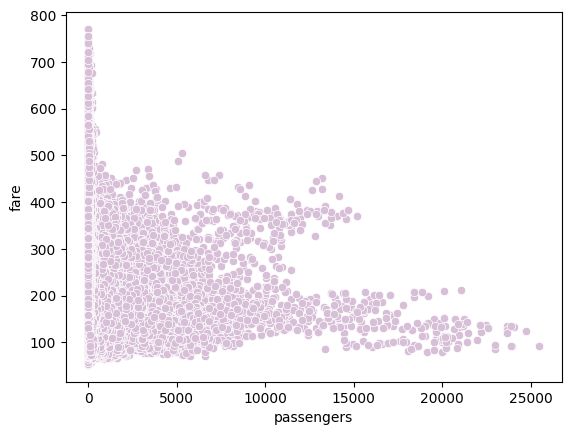

In [6]:
sns.scatterplot(data=df_flight, x='passengers', y='fare', color='#D8BFD8')

### Correlation matrix of numerical predictors

In [7]:
X1 = add_constant(numericalpredictor_col)
vif_data = pd.DataFrame()
vif_data["feature"] = X1.columns

for i in range(len(X1.columns)):
    vif_data.loc[vif_data.index[i],"VIF"] = variance_inflation_factor(X1.values, i)

vif_data

,feature,VIF
0,const,29.868874
1,brentcrude,1.122350
2,nsmiles,1.455839
3,passengers,1.053117
4,passenger_proportion_change,1.022197
5,fare_proportion_change,1.120807
6,ms_lm,1.520541
7,fare_lm,5.154534
8,ms_lf,1.776566
9,fare_lf,4.931584


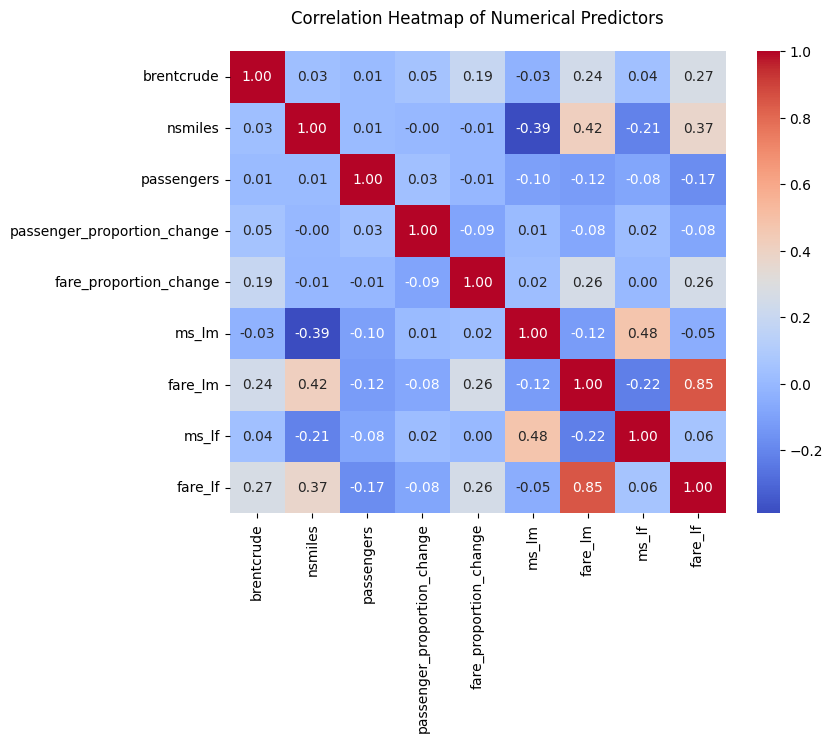

In [8]:
correlation_matrix = numericalpredictor_col.corr()

plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Predictors', pad=20)
plt.show()

There is high correlation between fare_lm (average fare for the carrier with the largest market share) and fare_lf (average fare for the carrier with the lowest average fare). However, we believe both pieces of information are useful for prediction. Therefore, we try adding a column fare_diff_avg_lowest (the fare difference between the market average fare and the average fare for carrier with the lowest average fare) to include this useful information without causing collinearity issues.

In [9]:
df_flight["fare_diff_avg_lowest"] = df_flight['fare'] - df_flight['fare_lf']
df_flight.drop(columns=['fare_lf'], inplace=True)

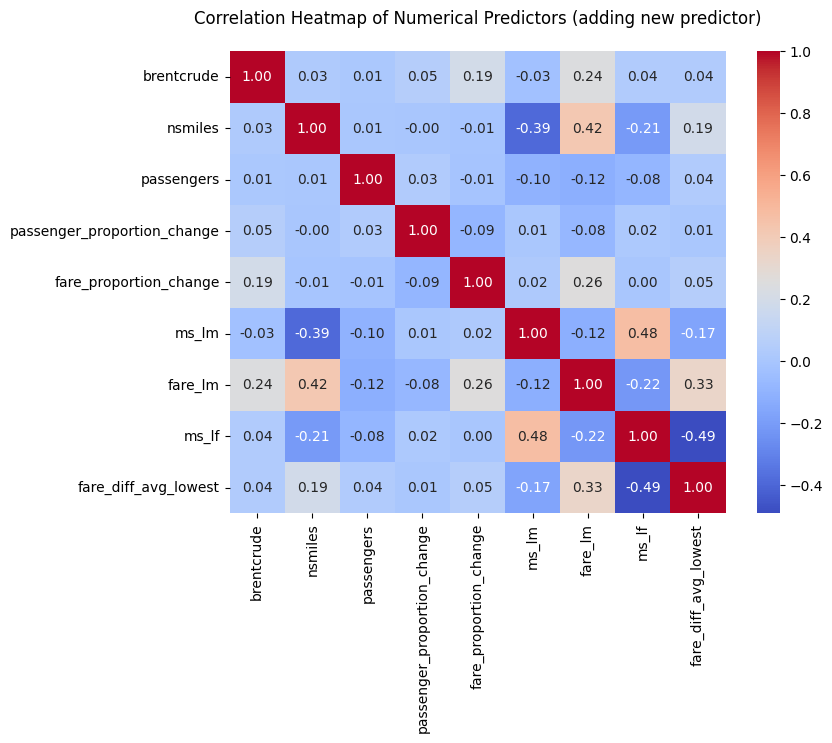

In [10]:
numericalpredictor_col = df_flight.drop(columns=['Year', 'quarter', 'route_id', 'city1', 'city2', 'fare', 'carrier_lm', 'carrier_lf'])
correlation_matrix_revised = numericalpredictor_col.corr()

plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation_matrix_revised, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Predictors (adding new predictor)', pad=20)
plt.show()

Observe the distribution of this new predictor

<Axes: xlabel='fare_diff_avg_lowest', ylabel='Count'>

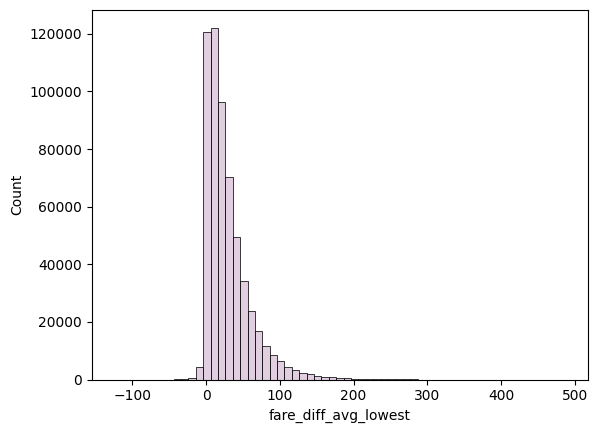

In [14]:
sns.histplot(x=df_flight['fare_diff_avg_lowest'], binwidth=10, color='#D8BFD8')

Some nonsense observations should be removed: fare_diff_avg_lowest < 0 (it makes no sense to have the market average fare lover than the average fare for carrier with the lowest average fare)